In [272]:
from hackyou import hackpy as hp
from hackyou import hackfilter as hf
from hackyou import hackforest as ht
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle

%matplotlib inline

In [112]:
#data_linear = pd.read_excel("rawdata/regression_data.xls")
train = pd.read_csv("rawdata/train.csv")
test = pd.read_csv("rawdata/test_no_class.csv")
#data_filter = pd.read_csv("rawdata/numerical.csv")


In [113]:
# clean SEX column

In [114]:
train['SEX'] = train['SEX'].apply(clean_gender)

In [115]:
test['SEX'] = test['SEX'].apply(clean_gender)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              102 non-null    int64  
 1   SEX              102 non-null    object 
 2   STEROID          102 non-null    float64
 3   ANTIVIRALS       102 non-null    int64  
 4   FATIGUE          102 non-null    int64  
 5   MALAISE          102 non-null    int64  
 6   ANOREXIA         102 non-null    int64  
 7   LIVER BIG        102 non-null    float64
 8   LIVER FIRM       102 non-null    float64
 9   SPLEEN PALPABLE  102 non-null    float64
 10  SPIDERS          102 non-null    float64
 11  ASCITES          102 non-null    float64
 12  VARICES          102 non-null    float64
 13  BILIRUBIN        102 non-null    float64
 14  ALK PHOSPHATE    84 non-null     float64
 15  SGOT             102 non-null    float64
 16  ALBUMIN          93 non-null     float64
 17  PROTIME         

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              53 non-null     int64 
 1   SEX              53 non-null     object
 2   STEROID          53 non-null     int64 
 3   ANTIVIRALS       53 non-null     int64 
 4   FATIGUE          53 non-null     object
 5   MALAISE          53 non-null     object
 6   ANOREXIA         53 non-null     object
 7   LIVER BIG        53 non-null     object
 8   LIVER FIRM       53 non-null     object
 9   SPLEEN PALPABLE  53 non-null     object
 10  SPIDERS          53 non-null     object
 11  ASCITES          53 non-null     object
 12  VARICES          53 non-null     object
 13  BILIRUBIN        53 non-null     object
 14  ALK PHOSPHATE    53 non-null     object
 15  SGOT             53 non-null     object
 16  ALBUMIN          53 non-null     object
 17  PROTIME          53 non-null     obje

In [13]:
hp.show_empty_variables(train)

In [82]:
hp.show_nan(train)

The column PROTIME has 47 NaN


In [107]:
hp.show_nan(test)

The column ALK PHOSPHATE has 11 NaN


In [ ]:
# parse to number

In [116]:
for column in train.columns:
    if column not in ["SEX", "Class"]:
        train[column] = pd.to_numeric(train[column], errors ='coerce')

In [117]:
for column in test.columns:
    if column not in ["SEX", "Class"]:
        test[column] = pd.to_numeric(test[column], errors ='coerce')

In [84]:
# hp.unique(train)

In [ ]:
# fill na

In [118]:
col_fillna =["STEROID", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "SGOT"]

In [119]:
col_fillna_test = ["FATIGUE", "MALAISE", "ANOREXIA"]

In [120]:
train = repl_median(train, col_fillna)

In [121]:
test = repl_median(test, col_fillna)

In [122]:
test = repl_median(test, col_fillna_test)

In [79]:
hp.show_nan(train)

The column PROTIME has 47 NaN


In [86]:
hp.unique(train)

AGE
[48 51 40 25 34 52 31 62 30 61 50 39 59 36 27 41 53 23 49 65 69 37 20 42
 54 38 33 28 22 45 46 35 24 44 56 47 43 60  7 58 67 32]
51    6
34    6
50    6
30    5
44    5
54    4
36    4
38    4
23    4
39    4
28    3
31    3
42    3
52    3
27    3
56    3
40    3
37    3
45    3
49    2
47    2
48    2
61    2
32    1
25    1
24    1
22    1
20    1
33    1
69    1
35    1
41    1
67    1
43    1
46    1
53    1
58    1
59    1
60    1
62    1
65    1
7     1
Name: AGE, dtype: int64
---------------
SEX
['M' 'F']
M    92
F    10
Name: SEX, dtype: int64
---------------
STEROID
[1. 2.]
2.0    52
1.0    50
Name: STEROID, dtype: int64
---------------
ANTIVIRALS
[2 1]
2    87
1    15
Name: ANTIVIRALS, dtype: int64
---------------
FATIGUE
[1 2]
1    64
2    38
Name: FATIGUE, dtype: int64
---------------
MALAISE
[1 2]
2    65
1    37
Name: MALAISE, dtype: int64
---------------
ANOREXIA
[2 1]
2    84
1    18
Name: ANOREXIA, dtype: int64
---------------
LIVER BIG
[2. 1.]
2.0    83
1.0    19

In [104]:
hp.unique(test)

AGE
[39 41 28 36 32 25 22 47 20 30 66 34 45 78 72 49 57 42 37 38 24 58 33 64
 26 62 61 70 54 27 35 31]
38    4
30    3
32    3
36    3
39    2
28    2
20    2
34    2
37    2
25    2
33    2
41    2
42    2
45    2
47    2
57    2
78    1
72    1
70    1
22    1
66    1
24    1
62    1
26    1
27    1
31    1
61    1
35    1
49    1
54    1
58    1
64    1
Name: AGE, dtype: int64
---------------
SEX
['M' 'F']
M    47
F     6
Name: SEX, dtype: int64
---------------
STEROID
[2 1]
2    27
1    26
Name: STEROID, dtype: int64
---------------
ANTIVIRALS
[2 1]
2    44
1     9
Name: ANTIVIRALS, dtype: int64
---------------
FATIGUE
[1. 2.]
1.0    37
2.0    16
Name: FATIGUE, dtype: int64
---------------
MALAISE
[2. 1.]
2.0    29
1.0    24
Name: MALAISE, dtype: int64
---------------
ANOREXIA
[2. 1.]
2.0    39
1.0    14
Name: ANOREXIA, dtype: int64
---------------
LIVER BIG
[2. 1.]
2.0    47
1.0     6
Name: LIVER BIG, dtype: int64
---------------
LIVER FIRM
[1. 2.]
2.0    33
1.0    20
Name: LIVER 

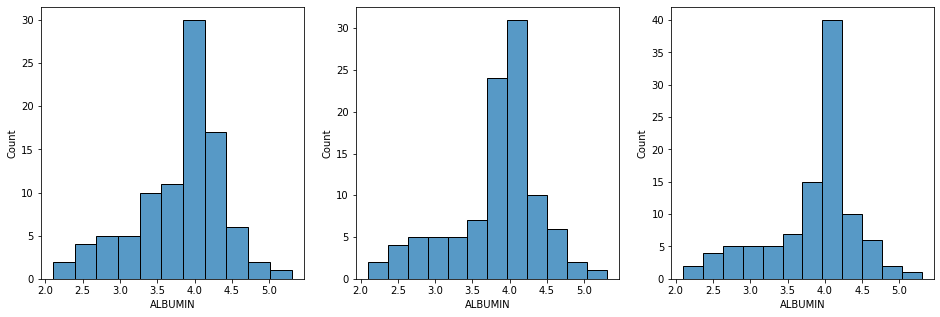

In [70]:
hp.display_filledna(train["ALBUMIN"])

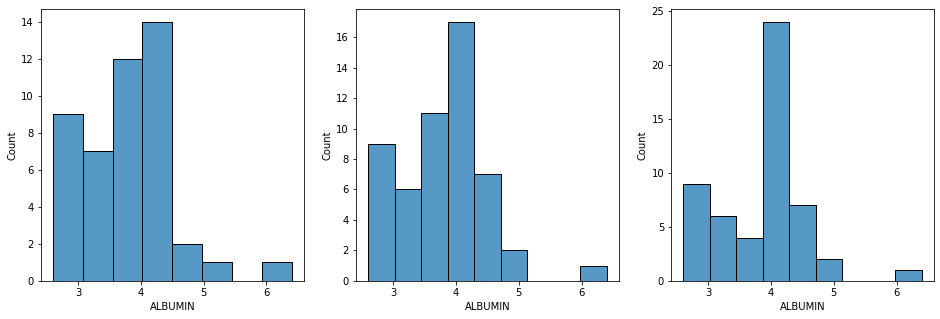

In [103]:
hp.display_filledna(test["ALBUMIN"])

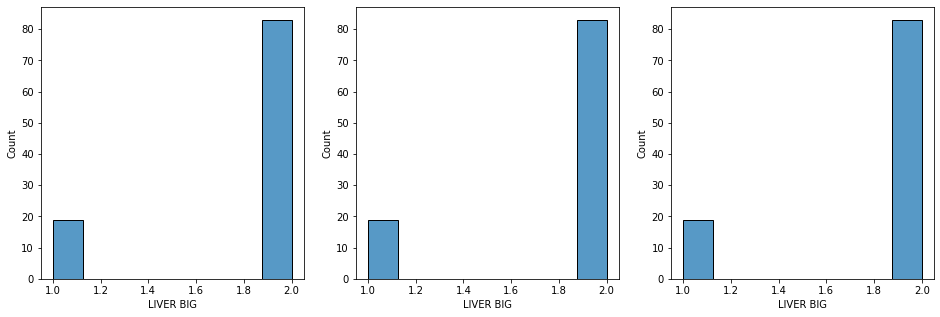

In [72]:
hp.display_filledna(train["LIVER BIG"])

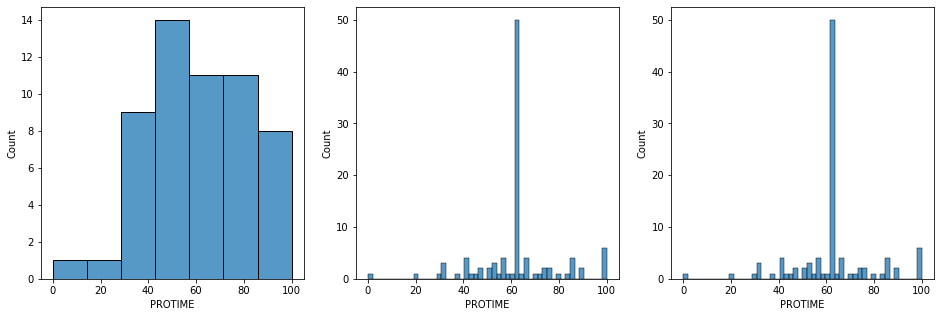

In [80]:
hp.display_filledna(train["PROTIME"])

In [84]:
hp.show_nan(test)

In [ ]:
# fill na with knn

In [144]:
# train
rows_without_na = train[train['ALK PHOSPHATE'].notna()].index
rows_with_na = train[train['ALK PHOSPHATE'].isna()].index
train_alk_nona = train[train['ALK PHOSPHATE'].notna()]
train_alk_na = train[train['ALK PHOSPHATE'].isna()]

In [147]:
# test
rows_with_na = test[test['ALK PHOSPHATE'].isna()].index

test_alk_na = test[test['ALK PHOSPHATE'].isna()]

In [136]:
X_alk = train_alk_nona.drop(columns=['ALK PHOSPHATE', "ALBUMIN", "PROTIME", "SEX", "Class"])
y_alk = train_alk_nona[["ALK PHOSPHATE"]]
X_alk_na =train_alk_na.drop(columns=['ALK PHOSPHATE', "ALBUMIN", "PROTIME", "SEX", "Class"])

In [137]:
X_alk_na_test =test_alk_na.drop(columns=['ALK PHOSPHATE', "ALBUMIN", "PROTIME", "SEX"])

In [138]:
X_alk_scaled, file = hp.min_max(X_alk, "alk")

In [139]:
X_alk_scaled_na = hp.min_max(X_alk_na, file, fit=False)

In [148]:
X_alk_scaled_na_test = hp.min_max(X_alk_na_test, file, fit=False)

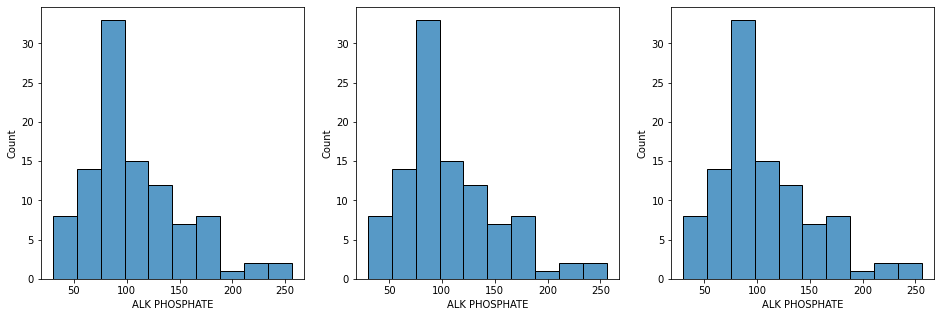

In [74]:
hp.display_filledna(train["ALK PHOSPHATE"])

In [154]:
m = np.round(train["ALBUMIN"].mean(), 1)
m

3.8

In [155]:
train["ALBUMIN"] = train["ALBUMIN"].fillna(m)

In [156]:
m = np.round(test["ALBUMIN"].mean(), 1)
m

3.8

In [157]:
test["ALBUMIN"] = test["ALBUMIN"].fillna(m)

In [140]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3) 
knn.fit(pd.DataFrame(X_alk_scaled),pd.DataFrame(y_alk))
pred = knn.predict(X_alk_scaled)

print("The accuracy of the model is: {:.2f}".format(r2_score(y_alk,pred)))

The accuracy of the model is: 0.50


In [141]:
pred_alk_na = knn.predict(X_alk_scaled_na)

In [149]:
pred_test_alk_na = knn.predict(X_alk_scaled_na_test)

In [145]:
train.loc[rows_with_na,"ALK PHOSPHATE"] = pred_alk_na

In [150]:
test.loc[rows_with_na,"ALK PHOSPHATE"] = pred_test_alk_na

In [146]:
train

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,48,M,1.0,2,1,1,2,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,31.0,2,DIE
1,51,M,2.0,2,1,2,2,2.0,1.0,1.0,1.0,2.0,1.0,1.0,107.0,20.0,3.0,63.0,2,LIVE
2,40,M,1.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.6,62.0,166.0,4.0,63.0,1,LIVE
3,25,M,2.0,2,1,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.3,181.0,181.0,4.5,57.0,2,LIVE
4,34,M,1.0,2,1,2,2,1.0,1.0,2.0,1.0,2.0,2.0,1.0,72.0,46.0,4.4,57.0,1,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23,M,2.0,2,1,1,1,2.0,2.0,1.0,2.0,2.0,2.0,1.3,194.0,150.0,4.1,90.0,1,LIVE
98,38,M,1.0,2,2,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.4,243.0,49.0,3.8,90.0,2,DIE
99,36,M,1.0,2,2,2,2,2.0,2.0,1.0,2.0,2.0,2.0,0.8,85.0,44.0,4.2,85.0,1,LIVE
100,32,M,1.0,1,1,1,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,55.0,45.0,4.1,56.0,1,LIVE


In [151]:
train = train.drop(columns = ["PROTIME"])

In [152]:
test = test.drop(columns = ["PROTIME"])

In [89]:
hp.unique(train)

AGE
[48 51 40 25 34 52 31 62 30 61 50 39 59 36 27 41 53 23 49 65 69 37 20 42
 54 38 33 28 22 45 46 35 24 44 56 47 43 60  7 58 67 32]
51    6
34    6
50    6
30    5
44    5
54    4
36    4
38    4
23    4
39    4
28    3
31    3
42    3
52    3
27    3
56    3
40    3
37    3
45    3
49    2
47    2
48    2
61    2
32    1
25    1
24    1
22    1
20    1
33    1
69    1
35    1
41    1
67    1
43    1
46    1
53    1
58    1
59    1
60    1
62    1
65    1
7     1
Name: AGE, dtype: int64
---------------
SEX
['M' 'F']
M    92
F    10
Name: SEX, dtype: int64
---------------
STEROID
[1. 2.]
2.0    52
1.0    50
Name: STEROID, dtype: int64
---------------
ANTIVIRALS
[2 1]
2    87
1    15
Name: ANTIVIRALS, dtype: int64
---------------
FATIGUE
[1 2]
1    64
2    38
Name: FATIGUE, dtype: int64
---------------
MALAISE
[1 2]
2    65
1    37
Name: MALAISE, dtype: int64
---------------
ANOREXIA
[2 1]
2    84
1    18
Name: ANOREXIA, dtype: int64
---------------
LIVER BIG
[2. 1.]
2.0    83
1.0    19

In [90]:
train

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY,Class
0,48,M,1.0,2,1,1,2,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,2,DIE
1,51,M,2.0,2,1,2,2,2.0,1.0,1.0,1.0,2.0,1.0,1.0,107.0,20.0,3.0,2,LIVE
2,40,M,1.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.6,62.0,166.0,4.0,1,LIVE
3,25,M,2.0,2,1,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.3,181.0,181.0,4.5,2,LIVE
4,34,M,1.0,2,1,2,2,1.0,1.0,2.0,1.0,2.0,2.0,1.0,72.0,46.0,4.4,1,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23,M,2.0,2,1,1,1,2.0,2.0,1.0,2.0,2.0,2.0,1.3,194.0,150.0,4.1,1,LIVE
98,38,M,1.0,2,2,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.4,243.0,49.0,3.8,2,DIE
99,36,M,1.0,2,2,2,2,2.0,2.0,1.0,2.0,2.0,2.0,0.8,85.0,44.0,4.2,1,LIVE
100,32,M,1.0,1,1,1,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,55.0,45.0,4.1,1,LIVE


In [158]:
hp.show_nan(train)

In [159]:
hp.show_nan(test)

In [95]:
col_hot = ["STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "HISTOLOGY"]

In [160]:
for column in col_hot:
    train[column] = train[column].astype(object)

In [162]:
for column in col_hot:
    test[column] = test[column].astype(object)

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              102 non-null    int64  
 1   SEX              102 non-null    object 
 2   STEROID          102 non-null    object 
 3   ANTIVIRALS       102 non-null    object 
 4   FATIGUE          102 non-null    object 
 5   MALAISE          102 non-null    object 
 6   ANOREXIA         102 non-null    object 
 7   LIVER BIG        102 non-null    object 
 8   LIVER FIRM       102 non-null    object 
 9   SPLEEN PALPABLE  102 non-null    object 
 10  SPIDERS          102 non-null    object 
 11  ASCITES          102 non-null    object 
 12  VARICES          102 non-null    object 
 13  BILIRUBIN        102 non-null    float64
 14  ALK PHOSPHATE    102 non-null    float64
 15  SGOT             102 non-null    float64
 16  ALBUMIN          102 non-null    float64
 17  HISTOLOGY       

In [163]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              53 non-null     int64  
 1   SEX              53 non-null     object 
 2   STEROID          53 non-null     object 
 3   ANTIVIRALS       53 non-null     object 
 4   FATIGUE          53 non-null     object 
 5   MALAISE          53 non-null     object 
 6   ANOREXIA         53 non-null     object 
 7   LIVER BIG        53 non-null     object 
 8   LIVER FIRM       53 non-null     object 
 9   SPLEEN PALPABLE  53 non-null     object 
 10  SPIDERS          53 non-null     object 
 11  ASCITES          53 non-null     object 
 12  VARICES          53 non-null     object 
 13  BILIRUBIN        53 non-null     float64
 14  ALK PHOSPHATE    53 non-null     float64
 15  SGOT             53 non-null     float64
 16  ALBUMIN          53 non-null     float64
 17  HISTOLOGY        5

In [172]:
test.to_csv("data/test_cleaned.csv", index=False)

In [173]:
train.to_csv("data/train_cleaned.csv", index=False)

In [174]:
#X, y - Train - Test - Split

In [ ]:
categories = [ list(categorical[col].unique()) for col in X_train_cat.columns ]
categories


In [175]:
X = train.drop(columns=["Class"])
y = train[["Class"]]

In [187]:
X_validate = test

In [183]:
X_cat = X.select_dtypes(object)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [178]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

In [179]:
X_train_num = X_train_df.select_dtypes(np.number)
X_test_num  = X_test_df.select_dtypes(np.number)
X_train_cat = X_train_df.select_dtypes(object)
X_test_cat  = X_test_df.select_dtypes(object)

In [188]:
X_validate_num  = X_validate.select_dtypes(np.number)
X_validate_cat = X_validate.select_dtypes(object)

In [180]:
# one hot - train

In [184]:
categories = [ list(X_cat[col].unique()) for col in X_train_cat.columns ]
categories

[['M', 'F'],
 [1.0, 2.0],
 [2, 1],
 [1, 2],
 [1, 2],
 [2, 1],
 [2.0, 1.0],
 [1.0, 2.0],
 [2.0, 1.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [1.0, 2.0],
 [2, 1]]

In [181]:
X_train_cat

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
12,M,2,2,2,2,2,2,1,1,1,2,2,2
85,M,1,2,2,2,2,2,2,2,2,2,2,2
91,M,2,2,2,2,2,2,2,2,2,2,2,1
69,M,1,2,1,1,2,2,2,1,2,1,2,2
16,M,2,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M,1,2,2,2,2,2,1,2,2,2,2,2
97,M,2,2,1,1,1,2,2,1,2,2,2,1
38,M,2,2,2,2,2,2,2,2,2,2,2,2
90,M,2,2,2,2,2,2,1,2,1,2,1,2


In [185]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = categories )

#X_train:
encoder.fit(X_train_cat) 
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols, index = X_train_cat.index)
display(X_train_cat_encoded_df.head())

#X_test:
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=cols, index = X_test_cat.index )
display(X_test_cat_encoded_df.head())


,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1
12,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
85,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
91,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
16,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1
41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
15,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
87,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [189]:
#X_validate:
X_validate_cat_encoded = encoder.transform(X_validate_cat).toarray()
X_validate_cat_encoded_df = pd.DataFrame(X_validate_cat_encoded, columns=cols, index = X_validate_cat.index )
display(X_validate_cat_encoded_df.head())

,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [191]:
X_train_enc = pd.concat([X_train_cat_encoded_df, X_train_num], axis=1)

In [192]:
X_test_enc = pd.concat([X_test_cat_encoded_df, X_test_num], axis=1)

In [193]:
X_validate_enc = pd.concat([X_validate_cat_encoded_df, X_validate_num], axis=1)

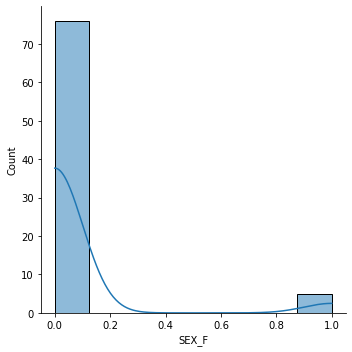

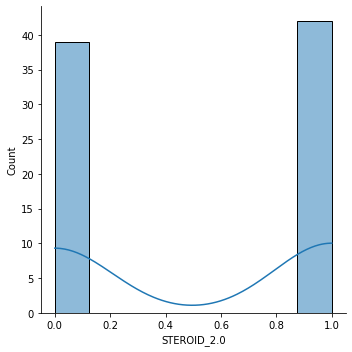

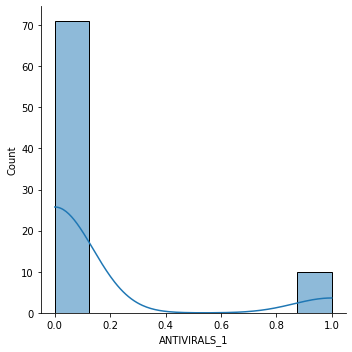

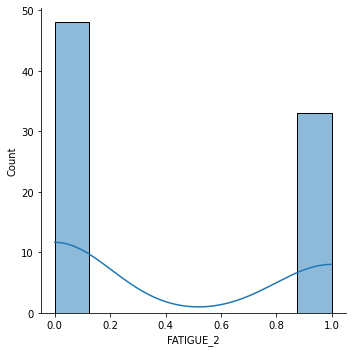

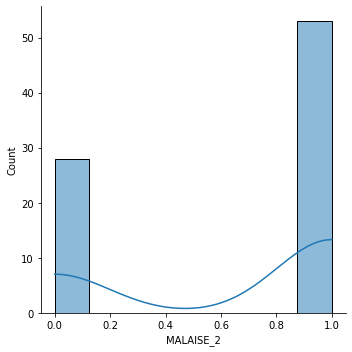

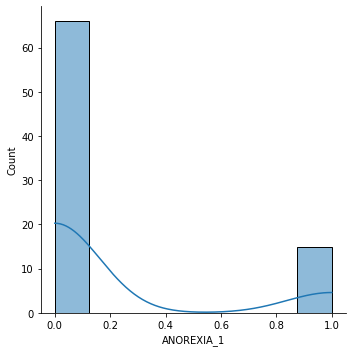

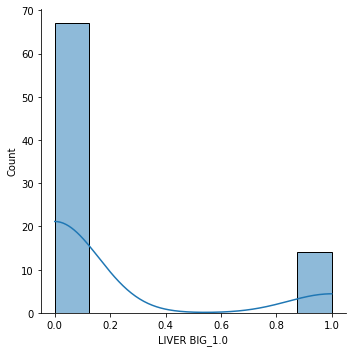

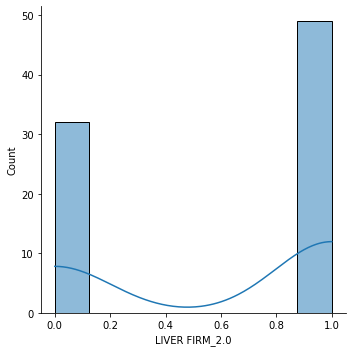

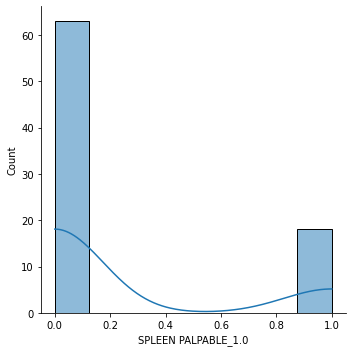

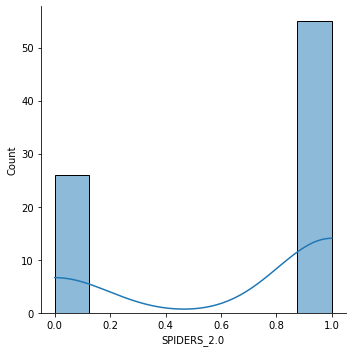

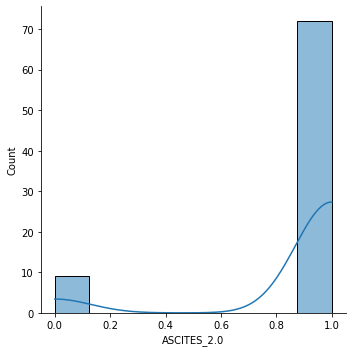

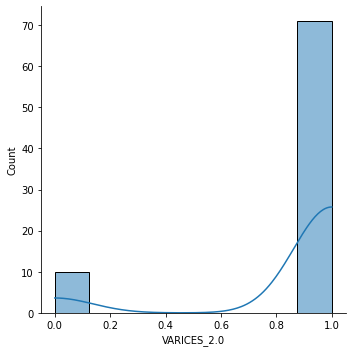

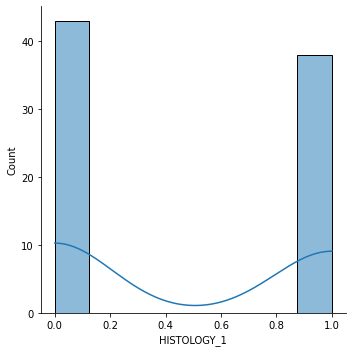

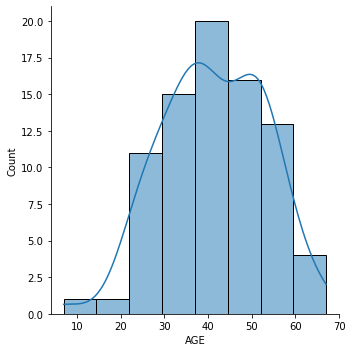

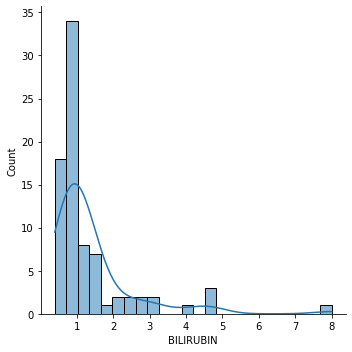

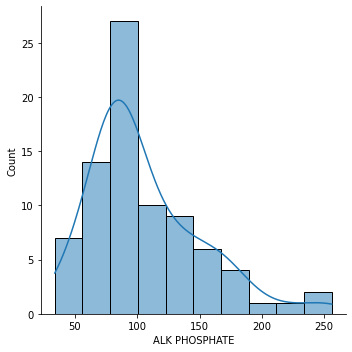

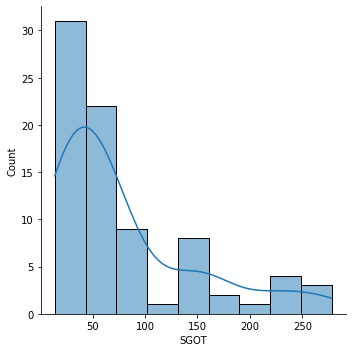

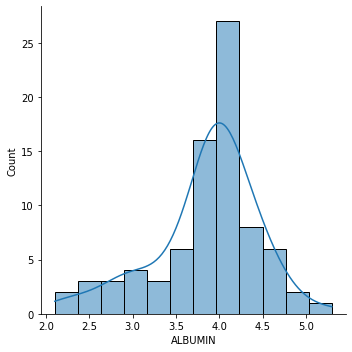

In [194]:
hp.plot_continous(X_train_enc)

In [196]:
from sklearn.preprocessing import PowerTransformer

#X_train:
ptransformer = PowerTransformer()
ptransformer.fit(X_train_enc) 
X_train_ptrans = ptransformer.transform(X_train_enc)
X_train_ptrans_df = pd.DataFrame(X_train_ptrans, columns=X_train_enc.columns, index = X_train_enc.index )
display(X_train_ptrans_df.head())

#X_test:
X_test_ptrans = ptransformer.transform(X_test_enc)
X_test_ptrans_df = pd.DataFrame(X_test_ptrans, columns=X_test_enc.columns, index = X_test_enc.index )
display(X_test_ptrans_df.head())


,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN
12,-0.256495,0.963624,-0.375293,1.206045,0.726844,-0.476731,-0.457116,-1.237437,1.870829,-1.454436,0.353553,0.375293,-0.940064,0.742812,-0.079629,-0.347800,0.415294,0.151706
85,-0.256495,-1.037749,-0.375293,1.206045,0.726844,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,-0.940064,-0.479993,0.139194,0.914643,0.415294,-0.998699
91,-0.256495,0.963624,-0.375293,1.206045,0.726844,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,-1.223313,-0.633898,-0.250405,-0.453901,0.541504
69,-0.256495,-1.037749,-0.375293,-0.829156,-1.375811,-0.476731,-0.457116,0.808122,1.870829,0.687552,-2.828427,0.375293,-0.940064,1.104653,1.853191,0.516883,-0.880070,-0.702547
16,-0.256495,0.963624,2.664583,1.206045,0.726844,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.897687,-0.988607,-1.932943,-0.039364,0.151706


,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN
41,-0.256495,0.963624,-0.375293,-0.829156,-1.375811,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,-1.142668,-0.988607,-0.700621,0.857928,0.960231
28,-0.256495,0.963624,-0.375293,-0.829156,-1.375811,-0.476731,-0.457116,-1.237437,1.870829,-1.454436,-2.828427,0.375293,-0.940064,2.124229,-3.340538,1.508793,-0.014943,-1.518308
52,-0.256495,-1.037749,-0.375293,-0.829156,-1.375811,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,0.209952,0.876761,-0.917350,0.296717,-0.380855
15,3.898718,-1.037749,2.664583,1.206045,0.726844,-0.476731,-0.457116,-1.237437,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.648411,-1.413131,-3.067076,-1.103595,0.151706
87,-0.256495,0.963624,2.664583,1.206045,0.726844,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.979841,-0.988607,-1.612020,-0.453901,-0.032645


In [197]:
#X_validate:
X_validate_ptrans = ptransformer.transform(X_validate_enc)
X_validate_ptrans_df = pd.DataFrame(X_validate_ptrans, columns=X_validate_enc.columns, index = X_validate_enc.index )
display(X_validate_ptrans_df.head())

,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN
0,-0.256495,0.963624,-0.375293,-0.829156,0.726844,-0.476731,-0.457116,-1.237437,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.224209,-0.988607,-1.465907,-0.142925,0.960231
1,3.898718,0.963624,2.664583,-0.829156,-1.375811,2.097618,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.051684,-0.988607,-0.470176,-0.014943,2.399518
2,-0.256495,-1.037749,-0.375293,-0.829156,-1.375811,2.097618,-0.457116,-1.237437,-0.534522,0.687552,0.353553,0.375293,1.063757,-1.142668,0.876761,-2.049808,0.980923,0.151706
3,-0.256495,-1.037749,-0.375293,-0.829156,-1.375811,2.097618,-0.457116,-1.237437,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.479993,-0.079629,-0.269568,-0.227533,0.151706
4,-0.256495,0.963624,-0.375293,1.206045,0.726844,-0.476731,-0.457116,0.808122,-0.534522,0.687552,0.353553,0.375293,1.063757,-0.815057,-0.988607,0.111749,0.222238,0.151706


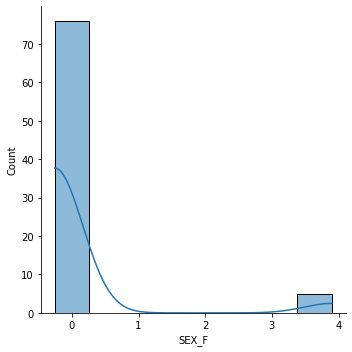

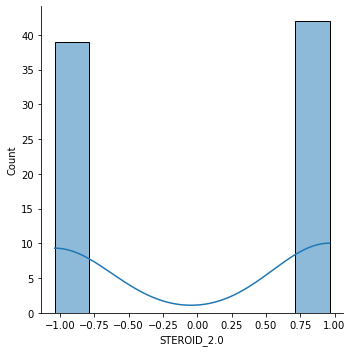

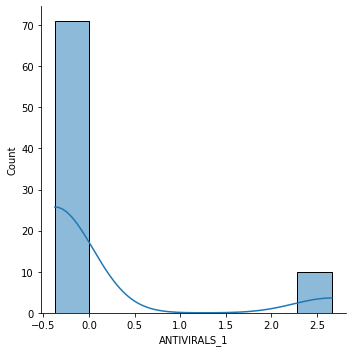

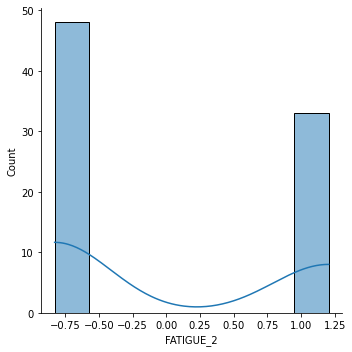

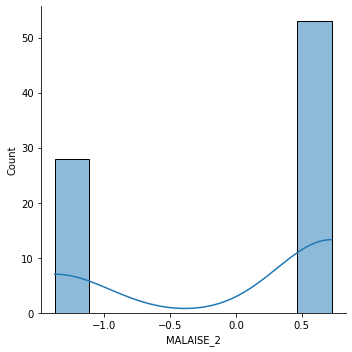

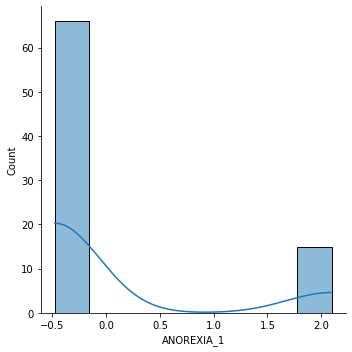

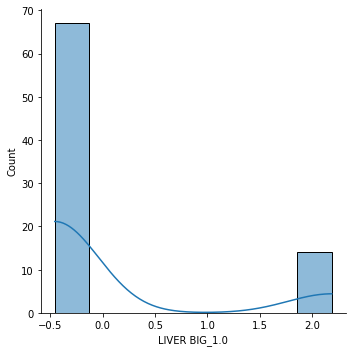

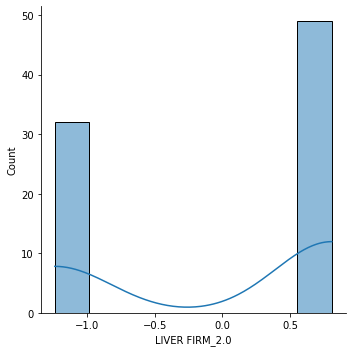

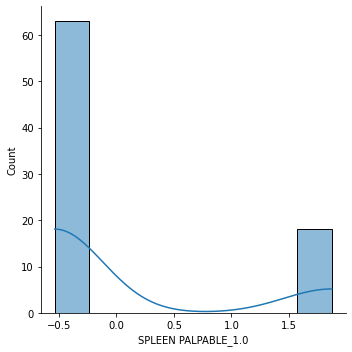

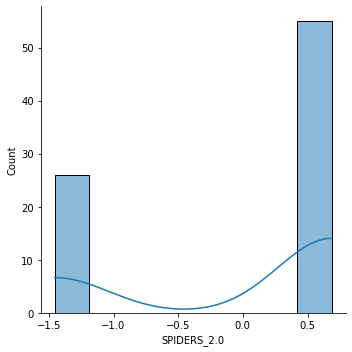

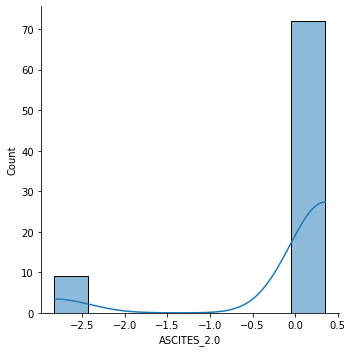

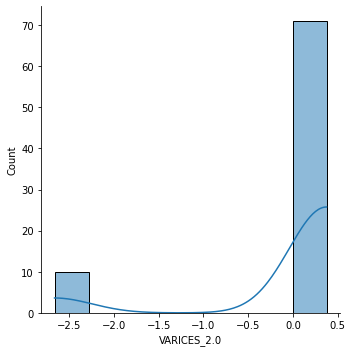

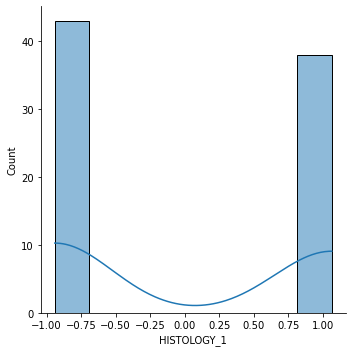

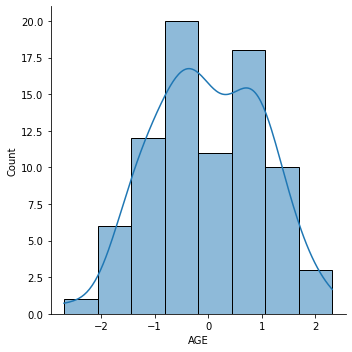

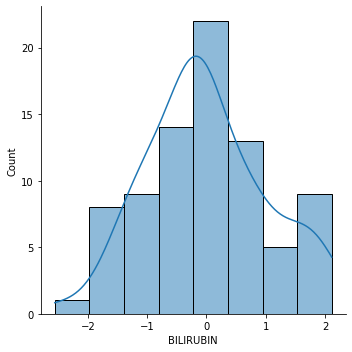

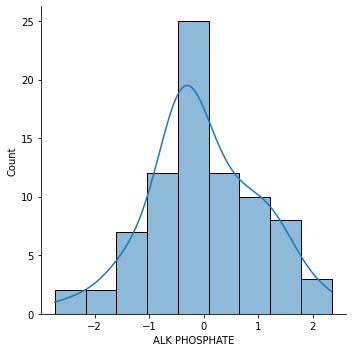

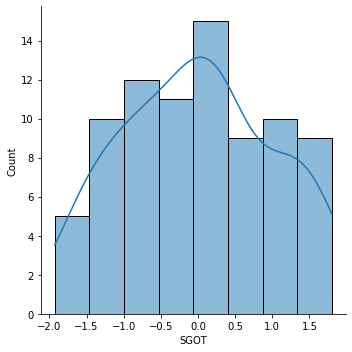

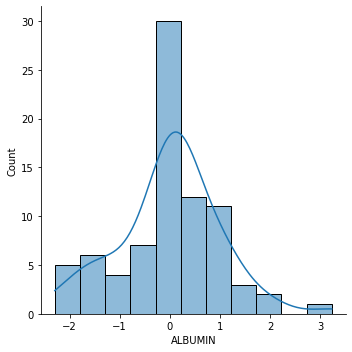

In [198]:
hp.plot_continous(X_train_ptrans_df)

In [199]:
X_train_min_max, file_min_max = hp.min_max(X_train_ptrans_df, "min_max_scale")

In [200]:
X_train_min_max

,SEX_F,STEROID_2.0,ANTIVIRALS_1,FATIGUE_2,MALAISE_2,ANOREXIA_1,LIVER BIG_1.0,LIVER FIRM_2.0,SPLEEN PALPABLE_1.0,SPIDERS_2.0,ASCITES_2.0,VARICES_2.0,HISTOLOGY_1,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.686258,0.530349,0.469369,0.628437,0.442965
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.441955,0.577196,0.717830,0.628437,0.234658
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.293448,0.411688,0.488538,0.395290,0.513547
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.758550,0.944138,0.639547,0.280977,0.288283
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.358504,0.335750,0.157398,0.506482,0.442965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.475942,0.000000,0.975806,0.485899,0.377447
77,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.230096,0.652964,0.870241,0.837004,0.477612
78,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.475942,0.335750,0.230335,0.431453,0.477612
79,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.475942,0.735098,0.678506,0.817494,0.288283


In [202]:
X_test_min_max = hp.min_max(X_test_ptrans_df, file_min_max, fit=False)

In [203]:
X_validate_min_max = hp.min_max(X_validate_ptrans_df, file_min_max, fit=False)

In [ ]:
# X_train_min_max
# X_test_min_max
# X_validate_min_max

In [275]:
X_train_min_max.to_csv("data/X_train_min_max.csv", index=False)
X_test_min_max.to_csv("data/X_test_min_max.csv", index = False)
X_validate_min_max.to_csv("data/X_validate_min_max.csv", index = False)

In [ ]:
# y_train
# y_test

In [276]:
y_train.to_csv("data/y_train.csv", index=False)
y_test.to_csv("data/y_train.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------
-----Logistic Regression-----
----------Train Set----------
-----------------------------
The accuracy in the TRAIN set is: 0.94
The precision in the TRAIN set is: 0.91
The recall in the TRAIN set is: 0.71
The F1 in the TRAIN set is: 0.80
The Cohen-Kappa-Score in the TRAIN set is: 0.76
-----------------------------
-----Logistic Regression-----
-----------Test Set----------
-----------------------------
The accuracy in the TEST set is: 0.76
The precision in the TEST set is: 0.75
The recall in the TEST set is: 0.43
The F1 in the TEST set is: 0.55
The Cohen-Kappa-Score in the TEST set is: 0.40
-----------------------------
Filename Linear: log_reg_logistic.sav


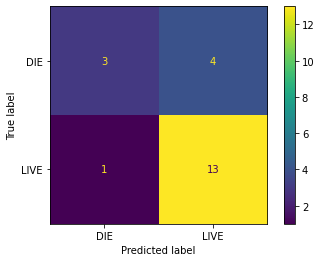

In [218]:
file_log_reg = hp.logistic_regression(X_test_min_max, y_test, "log_reg", ["LIVE", "DIE"], X_train = X_train_min_max, y_train = y_train)

In [208]:
X_train_SMOTE, y_train_SMOTE = hp.smote(X_train_min_max, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------
-----Logistic Regression-----
----------Train Set----------
-----------------------------
The accuracy in the TRAIN set is: 0.90
The precision in the TRAIN set is: 0.90
The recall in the TRAIN set is: 0.91
The F1 in the TRAIN set is: 0.90
The Cohen-Kappa-Score in the TRAIN set is: 0.81
-----------------------------
-----Logistic Regression-----
-----------Test Set----------
-----------------------------
The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.71
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.71
The Cohen-Kappa-Score in the TEST set is: 0.57
-----------------------------
Filename Linear: log_reg_smote_logistic.sav


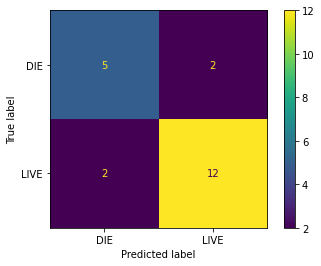

In [217]:
file_log_reg_smote = hp.logistic_regression(X_test_min_max, y_test, "log_reg_smote", ["LIVE", "DIE"], X_train = X_train_SMOTE, y_train = y_train_SMOTE)

In [214]:
test = pd.DataFrame(y_train_SMOTE)

In [215]:
test["Class"].value_counts()

DIE     67
LIVE    67
Name: Class, dtype: int64

In [220]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train_min_max, y_train)
#display(pd.concat([X_train_over,y_train_over],axis=1).head())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------
-----Logistic Regression-----
----------Train Set----------
-----------------------------
The accuracy in the TRAIN set is: 0.87
The precision in the TRAIN set is: 0.88
The recall in the TRAIN set is: 0.87
The F1 in the TRAIN set is: 0.87
The Cohen-Kappa-Score in the TRAIN set is: 0.75
-----------------------------
-----Logistic Regression-----
-----------Test Set----------
-----------------------------
The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.71
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.71
The Cohen-Kappa-Score in the TEST set is: 0.57
-----------------------------
Filename Linear: log_reg_oversamp_logistic.sav


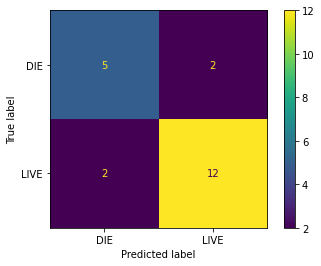

In [222]:
file_log_reg_oversamp = hp.logistic_regression(X_test_min_max, y_test, "log_reg_oversamp", ["LIVE", "DIE"], X_train = X_train_over, y_train = y_train_over)

In [ ]:
# decision tree

In [ ]:
ht.decision_tree(X_test_min_max, y_test, "tree", ["LIVE", "DIE"], X_train = X_train_min_max, y_train = y_train)

In [253]:
from sklearn.tree import DecisionTreeClassifier

regr = DecisionTreeClassifier(max_depth=grid['max_depth'],
                             criterion = grid['criterion'],
                             min_samples_split=grid['min_samples_split'],
                             min_samples_leaf = grid['min_samples_leaf'],
                             max_features = grid['max_features'])
model = regr.fit(X_train_min_max, y_train)
y_pred_train = model.predict(X_train_min_max)
y_pred_test = model.predict(X_test_min_max)
filename = "min_max"
filename_model = filename + "_tree.sav"
pickle.dump(model, open("models/"+filename_model, 'wb'))

In [254]:
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train,y_pred_train)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The Kappa in the TRAIN set is: 0.75
The Kappa in the TEST set is: 0.54


In [263]:
regr_over = DecisionTreeClassifier(max_depth=grid_over['max_depth'],
                             criterion = grid_over['criterion'],
                             min_samples_split=grid_over['min_samples_split'],
                             min_samples_leaf = grid_over['min_samples_leaf'],
                             max_features = grid_over['max_features'])
model_over = regr_over.fit(X_train_over, y_train_over)
y_pred_train = model_over.predict(X_train_over)
y_pred_test = model_over.predict(X_test_min_max)
filename = "oversamp"
filename_model = filename + "_tree.sav"
pickle.dump(model_over, open("models/"+filename_model, 'wb'))

In [265]:
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train_over,y_pred_train)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The Kappa in the TRAIN set is: 0.97
The Kappa in the TEST set is: 0.79


In [310]:
regr_smote = DecisionTreeClassifier(max_depth=grid_smote['max_depth'],
                             criterion = grid_smote['criterion'],
                             min_samples_split=grid_smote['min_samples_split'],
                             min_samples_leaf = grid_smote['min_samples_leaf'],
                             max_features = grid_smote['max_features'])
model_smote = regr_smote.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_train = model_smote.predict(X_train_SMOTE)
y_pred_test = model_smote.predict(X_test_min_max)
filename = "SMOTE"
filename_model = filename + "_tree.sav"
pickle.dump(model_smote, open("models/"+filename_model, 'wb'))

In [311]:
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train_over,y_pred_train)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The Kappa in the TRAIN set is: 0.87
The Kappa in the TEST set is: 0.57


In [251]:
grid = {'max_depth': 5,
               'criterion': 'gini',
               'min_samples_split': 7,
               'min_samples_leaf': 4,
               'max_features': 3}

In [257]:
grid_over = {'max_depth': 7,
               'criterion': 'gini',
               'min_samples_split': 5,
               'min_samples_leaf': 2,
               'max_features': 7}

In [309]:
grid_smote = {'max_depth': 6,
               'criterion': 'gini',
               'min_samples_split': 8,
               'min_samples_leaf': 4,
               'max_features': 8}

In [7]:
# grid search

In [245]:
max_depth_choices= [3,4,5,6,7,8,9,10,None] 
criterion_choices = ['gini','entropy']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10] 
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]   
max_feat = [2,3,4,5,6,7,8,9]

In [246]:
grid_search = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_feat
       }

In [249]:
bes_tree_args = ht.grid_search(X_train_min_max, y_train, grid_search, cv = 5, model = "classification")

{'criterion': 'gini', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 7}
The best R2 for the best hyperparameters is 0.91


In [255]:
best_tree_args_over = ht.grid_search(X_train_over, y_train_over, grid_search, cv = 5, model = "classification")

{'criterion': 'gini', 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
The best R2 for the best hyperparameters is 0.98


In [308]:
best_tree_args_SMOTE = ht.grid_search(X_train_SMOTE, y_train_SMOTE, grid_search, cv = 5, model = "classification")

{'criterion': 'gini', 'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 8}
The best R2 for the best hyperparameters is 0.95


In [10]:
# random search

In [11]:
max_depth_choices= [3,4,5,6,7,8,9,10,None] # A list of the possible values of max_depth to try at random
criterion_choices =  ['squared_error','absolute_error'] # A list of the possible values optimization metrics
min_samples_split_choices = [2,3,4,5,6,7,8,9,10] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10] # A list of the possible values of min_samples_leaf to try 
max_features_choices = [2,3,4,5,6] # A list of max_features to use in the Decission tree


In [12]:
random_grid_2 = {'max_depth': max_depth_choices,
                   'criterion': criterion_choices,
                   'min_samples_split': min_samples_split_choices,
                   'min_samples_leaf': min_samples_leaf_choices,
                   'max_features': max_features_choices}

In [13]:
# forest grid

In [266]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[10, 20, 30]
min_sample_leaf=[10, 20, 30]
max_samples=[0.4, 0.8, 1.2]
random_state=[24, 42, 56]

In [267]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }

In [273]:
model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_forest, n_iter=25, cv = 5, n_jobs = 2)
random_search.fit(X_train_over,y_train_over)
print(random_search.best_params_)
print("The best R2 for the best hyperparameters is {:.2f}".format(random_search.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 117, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_samp

{'random_state': 24, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_samples': 0.8, 'max_depth': 9}
The best R2 for the best hyperparameters is 0.87


C:\Users\micle\Ironhack_DAFTFEB2022\GitHub\IronHackathon\hackyou\hackforest.py:174: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


The R2 for the Random Forest in the TRAIN set is 0.91
The R2 for the Random Forest in the TEST  set is 0.86
-----------------------------
-----Logistic Regression-----
----------Train Set----------
-----------------------------
The accuracy in the TRAIN set is: 0.91
The precision in the TRAIN set is: 0.90
The recall in the TRAIN set is: 0.93
The F1 in the TRAIN set is: 0.91
The Cohen-Kappa-Score in the TRAIN set is: 0.82
-----------------------------
-----Logistic Regression-----
-----------Test Set----------
-----------------------------
The accuracy in the TEST set is: 0.86
The precision in the TEST set is: 0.75
The recall in the TEST set is: 0.86
The F1 in the TEST set is: 0.80
The Cohen-Kappa-Score in the TEST set is: 0.69
-----------------------------
Filename Linear: forest_forest.sav


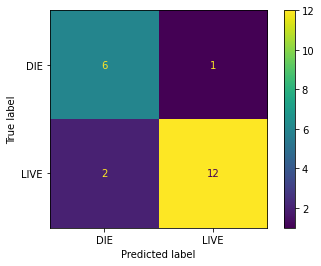

In [281]:
file_forest = ht.random_forest_class(X_test_min_max, y_test, forest_grid, "forest", ["LIVE", "DIE"], X_train = X_train_over, y_train = y_train_over)

In [278]:
forest_grid = {'max_depth': 9,    
                'min_samples_split': 10,
                'min_samples_leaf': 10,
                'max_samples': 0.8,
                'random_state': 24
               }

In [ ]:
# make predictions

In [298]:
loaded_linear_lc = pickle.load(open("models/log_reg_oversamp_logistic.sav", 'rb'))
y_validate_lc_oversamp = loaded_linear_lc.predict(X_validate_min_max)
y_validate_lc_oversamp = pd.DataFrame(y_validate_lc_oversamp)
y_validate_lc_oversamp.columns = ["Class_Pred_Lc_Over"]
y_validate_lc_oversamp.to_csv("data/y_validate_lc_oversamp.csv", index = False)

In [295]:
y_validate_lc_oversamp["Class_Pred_Lc_Over"].value_counts()

LIVE    39
DIE     14
Name: Class_Pred_Lc_Over, dtype: int64

In [299]:
loaded_linear_lc_smote = pickle.load(open("models/log_reg_smote_logistic.sav", 'rb'))
y_validate_lc_smote = loaded_linear_lc_smote.predict(X_validate_min_max)
y_validate_lc_smote = pd.DataFrame(y_validate_lc_smote)
y_validate_lc_smote.columns = ["Class_Pred_Lc_SMOTE"]
y_validate_lc_smote.to_csv("data/y_validate_lc_smote.csv", index = False)

In [300]:
y_validate_lc_smote["Class_Pred_Lc_SMOTE"].value_counts()

LIVE    40
DIE     13
Name: Class_Pred_Lc_SMOTE, dtype: int64

In [301]:
loaded_linear_tree = pickle.load(open("models/min_max_tree.sav", 'rb'))
y_validate_tree = loaded_linear_tree.predict(X_validate_min_max)
y_validate_tree = pd.DataFrame(y_validate_tree)
y_validate_tree.columns = ["Class_Pred_Tree_Over"]
y_validate_tree.to_csv("data/y_validate_tree_over.csv", index = False)

In [302]:
y_validate_tree["Class_Pred_Tree_Over"].value_counts()

LIVE    42
DIE     11
Name: Class_Pred_Tree_Over, dtype: int64

In [303]:
loaded_forest = pickle.load(open("models/forest_forest.sav", 'rb'))
y_validate_forest = loaded_forest.predict(X_validate_min_max)
y_validate_forest = pd.DataFrame(y_validate_forest)
y_validate_forest.columns = ["Class_Pred_Forest_Over"]
y_validate_forest.to_csv("data/y_validate_forest_over.csv", index = False)

In [304]:
y_validate_forest["Class_Pred_Forest_Over"].value_counts()

LIVE    36
DIE     17
Name: Class_Pred_Forest_Over, dtype: int64

In [306]:
loaded_linear = pickle.load(open("models/log_reg_logistic.sav", 'rb'))
y_validate_log = loaded_linear.predict(X_validate_min_max)
y_validate_log = pd.DataFrame(y_validate_log)
y_validate_log.columns = ["Class_Pred_Log"]
y_validate_log.to_csv("data/y_validate_log.csv", index = False)

In [307]:
y_validate_log["Class_Pred_Log"].value_counts()

LIVE    47
DIE      6
Name: Class_Pred_Log, dtype: int64

In [312]:
loaded_tree_smote = pickle.load(open("models/SMOTE_tree.sav", 'rb'))
y_validate_smote_tree = loaded_tree_smote.predict(X_validate_min_max)
y_validate_smote_tree = pd.DataFrame(y_validate_smote_tree)
y_validate_smote_tree.columns = ["Class_Pred_Tree_SMOTE"]
y_validate_smote_tree.to_csv("data/y_validate_tree_smote.csv", index = False)

In [313]:
y_validate_smote_tree["Class_Pred_Tree_SMOTE"].value_counts()

LIVE    40
DIE     13
Name: Class_Pred_Tree_SMOTE, dtype: int64

In [314]:
y_validate_smote_tree

,Class_Pred_Tree_SMOTE
0,LIVE
1,LIVE
2,LIVE
3,LIVE
4,LIVE
5,LIVE
6,LIVE
7,LIVE
8,DIE
9,LIVE


In [18]:
# functions

In [6]:
def clean_gender(x):
    females = ['Feamle', 'female', 'F']
    males = ['M','Male','meale','m','male']
    found_female = False
    found_male = False
    for elem in females:
        if ( elem in x ):
            return "F"
            found_female = True
            break
    if ( found_female == False ):
        for elem in males:
            if ( elem in x ):
                return "M"
                found_male = True
                break


In [7]:
def to_int(x):
    x = pd.to_numeric(x, errors='coerce')
    return x


In [93]:
def to_object(x):
    x = pd.to_object(x, errors='coerce')
    return x


In [28]:
def repl_median(df, columns):
    df = df.copy()
    for col in columns:
        m = df[col].median()
        df[col] = df[col].fillna(m)
    return df